# [Visualizing Formula 1 Race Strategies in Python using Fastf1, Pandas and Matplotlib](https://medium.com/towards-formula-1-analysis/visualizing-formula-1-race-strategies-in-python-using-fastf1-pandas-and-matplotlib-95fe6b3298fa)

In [17]:
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd

In [18]:
# Enable the cache
ff1.Cache.enable_cache('cache')

In [19]:
year = 2022
circuit = 'Bahrain'

# Load the session data
race = ff1.get_session(year, circuit, 'R')
laps = race.load_laps(with_telemetry=True)

/Users/kepstein/.pyenv/versions/3.9.4/envs/fastf1/lib/python3.9/site-packages/fastf1/core.py:1220: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Bahrain Grand Prix - Race [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
/Users/kepstein/.pyenv/versions/3.9.4/envs/fastf1/lib/python3.9/site-packages/fastf1/core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, result], sort

In [20]:
driver_stints = laps[['Driver', 'Stint', 'Compound', 'LapNumber']].groupby(
    ['Driver', 'Stint', 'Compound']
).count().reset_index()

In [21]:
driver_stints = driver_stints.rename(columns={'LapNumber': 'StintLength'})

driver_stints = driver_stints.sort_values(by=['Stint'])

In [22]:
compound_colors = {
    'SOFT': '#FF3333',
    'MEDIUM': '#FFF200',
    'HARD': '#EBEBEB',
    'INTERMEDIATE': '#39B54A',
    'WET': '#00AEEF',
}

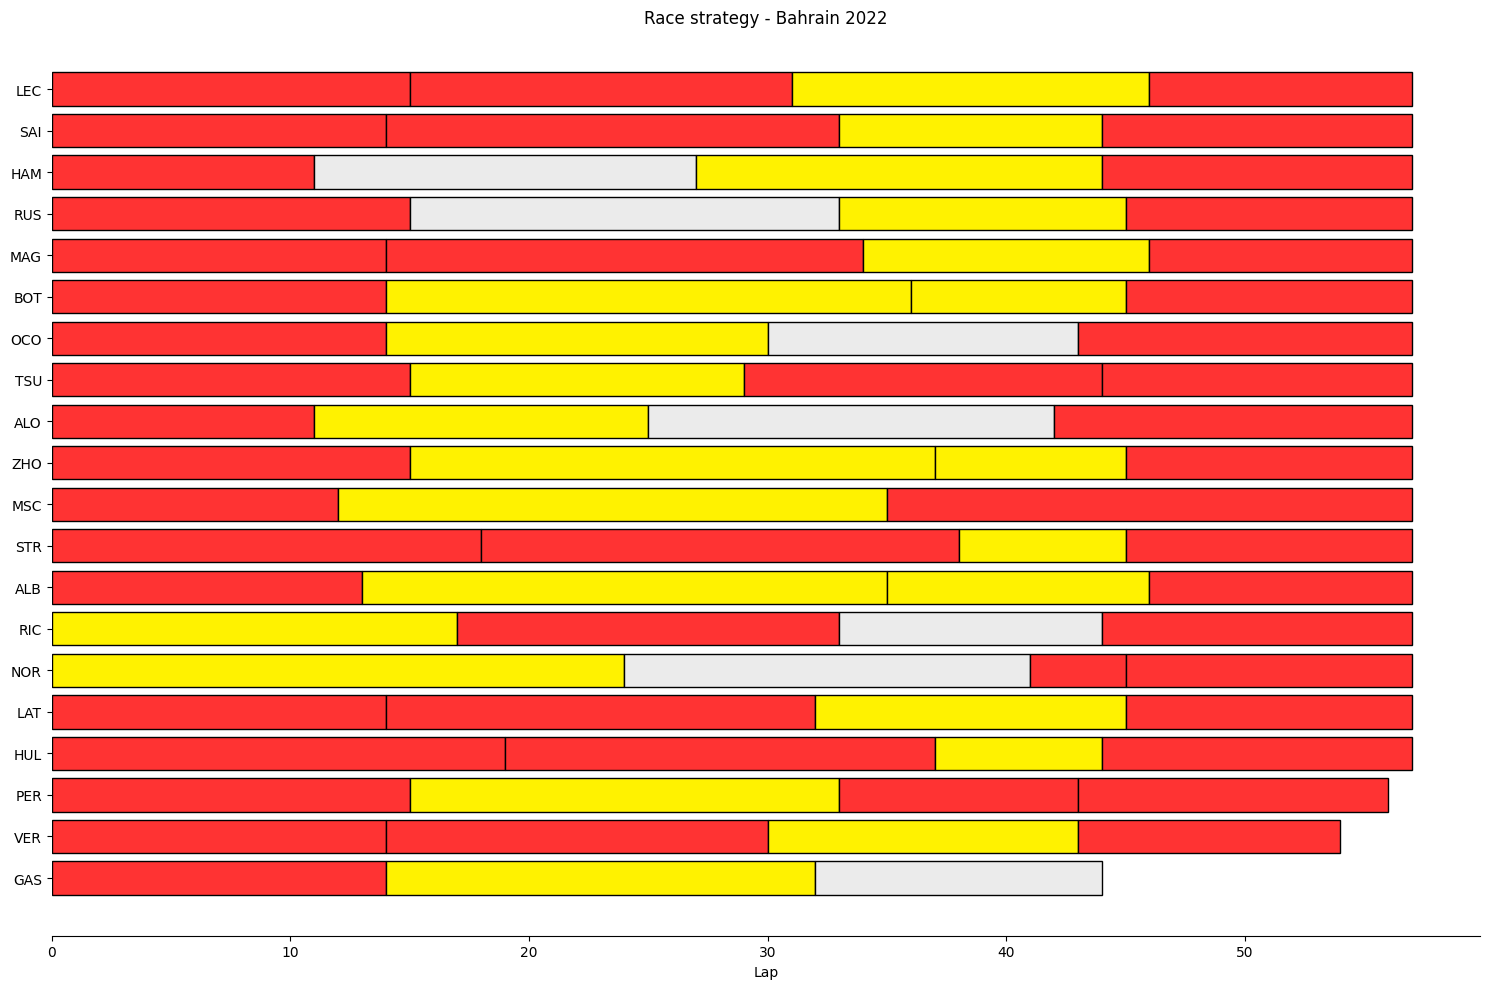

In [23]:
plt.rcParams["figure.figsize"] = [15, 10]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()

for driver in race.results['Abbreviation']:
    stints = driver_stints.loc[driver_stints['Driver'] == driver]

    previous_stint_end = 0
    for _, stint in stints.iterrows():
        plt.barh(
            [driver],
            stint['StintLength'],
            left=previous_stint_end,
            color=compound_colors[stint['Compound']],
            edgecolor = "black"
        )

        previous_stint_end = previous_stint_end + stint['StintLength']

# Set title
plt.title(f'Race strategy - {circuit} {year}')

# Set x-label
plt.xlabel('Lap')

# Invert y-axis
plt.gca().invert_yaxis()

# Remove frame from plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plot_filename = f'Race strategy - {circuit} {year}.png'
plt.savefig(plot_filename, dpi=1200)

plt.show()